Take image input and covert grayscale and binary image 

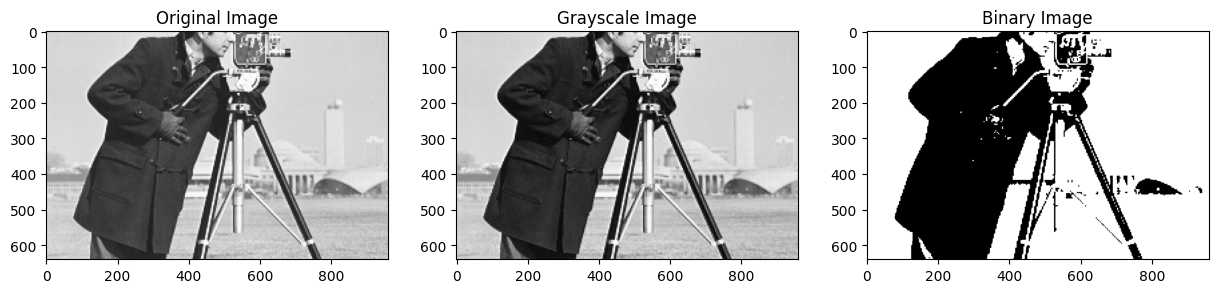

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("C:/Users/mLc/Downloads/image_processing.png")

height, width, _ = img.shape

# Create an empty array to store the grayscale image
gray_img = np.zeros((height, width), dtype=np.uint8)

# Convert the image to grayscale using a for loop
for i in range(height):
    for j in range(width):
        # Compute the mean of the BGR channels for each pixel
        gray_img[i][j] = np.mean(img[i][j])

# Create a binary image (black and white) based on thresholding
threshold = 127
bin_img = np.zeros((height, width), dtype=np.uint8)
for i in range(height):
    for j in range(width):
        if gray_img[i][j] > threshold:  # Compare individual pixel value
            bin_img[i][j] = 255  # Set white pixel

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale Image")

plt.subplot(1, 3, 3)
plt.imshow(bin_img, cmap='gray')
plt.title("Binary Image")

plt.show()


ADD,SUBTRACTION,AND,OR OPERATION BETWEEN TWO IMAGE

C:\Users\mLc\AppData\Local\Temp\ipykernel_11028\3408415782.py:15: RuntimeWarning: overflow encountered in scalar subtract
  res_img[i][j] = (img1[i][j] - resize_img[i][j])


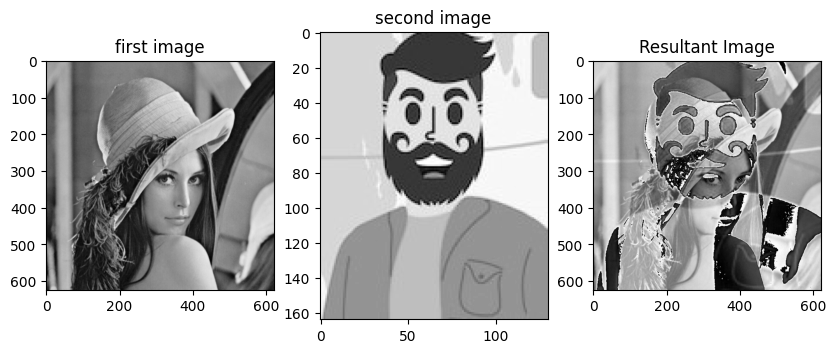

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read two grayscale images
img1 = cv2.imread("C:/Users/mLc/Pictures/image_processing.png", 0)
img2 = cv2.imread("C:/Users/mLc/Pictures/avatar.jpg", 0)

resize_img = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

res_img = np.zeros_like(img1)

for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        res_img[i][j] = (img1[i][j] - resize_img[i][j])


res_img = np.clip(res_img, 0, 255)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)

plt.imshow(img1, cmap='gray')

plt.title('first image')

plt.subplot(1, 3, 2)

plt.imshow(img2, cmap='gray')

plt.title('second image')

plt.subplot(1, 3, 3)

plt.imshow(res_img, cmap='gray')

plt.title('Resultant Image')

plt.show()









Add Boundary/Border 

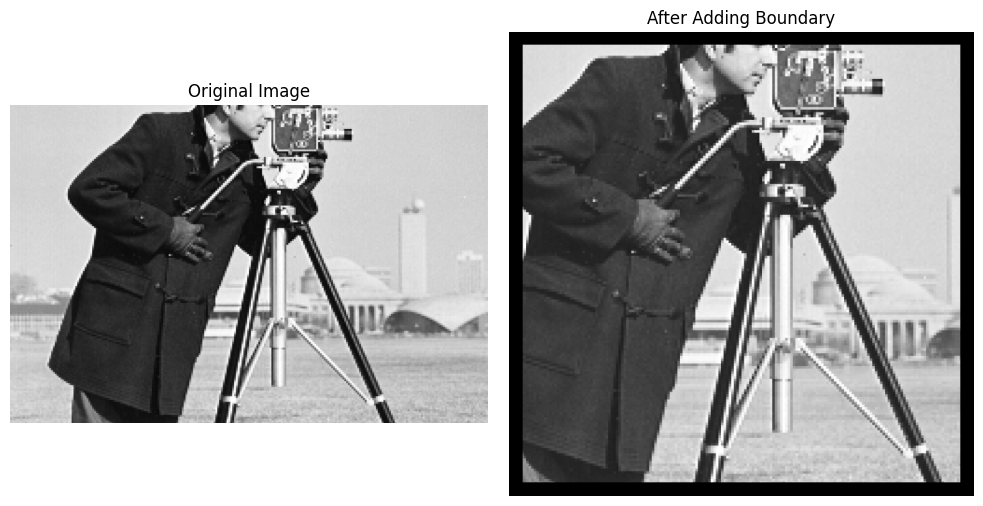

In [21]:


# Get the dimensions of the grayscale image
height, width = gray_img.shape

# Determine the size of the square
square_size = min(height, width)

# Calculate the cropping parameters
crop_x = (width - square_size) // 2
crop_y = (height - square_size) // 2

# Crop the image to make it square
cropped_img = gray_img[crop_y:crop_y+square_size, crop_x:crop_x+square_size]


# Read the cropped grayscale image
boundary_img = cropped_img

# Define boundary size
boundary_size = 20

# Get the dimensions of the boundary image
height, width = boundary_img.shape

# Determine the maximum dimension
max_dim = max(height, width)

# Create a square image with padding
square_img = np.zeros((max_dim + 2 * boundary_size, max_dim + 2 * boundary_size), dtype=np.uint8)

# Calculate padding for height and width
padding_height = (max_dim - height) // 2
padding_width = (max_dim - width) // 2

# Assign the content of boundary_img to the center of square_img with padding
square_img[boundary_size + padding_height: boundary_size + padding_height + height, 
           boundary_size + padding_width: boundary_size + padding_width + width] = boundary_img

# Display the result with equal subplot sizes
plt.figure(figsize=(10, 5))  # Set the size of the figure
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(square_img, cmap='gray')
plt.title('After Adding Boundary')
plt.axis('off')
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()


Add diagonal value and assign it to zero so that it will be black

total sum of the diagonal value is :  87540


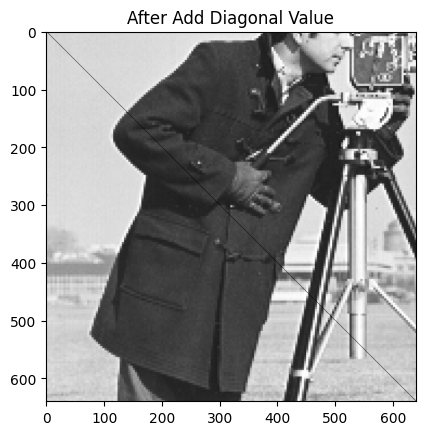

In [22]:
sum = 0
h, w, _ = img.shape
m = min(h, w)
diagonal_img = np.zeros((m, m), dtype=np.uint8)

for i in range (diagonal_img.shape[0]):
    for j in range(diagonal_img.shape[1]):
        if i == j:
            sum += gray_img[i][j]
            diagonal_img[i][j] = 0
        else:
          
          diagonal_img[i][j] = gray_img[i][j]


print("total sum of the diagonal value is : ", sum)
plt.imshow(diagonal_img, cmap='gray')
plt.title('After Add Diagonal Value')

plt.show()

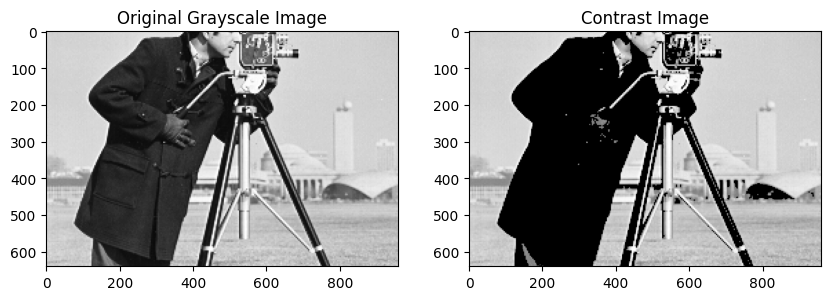

In [23]:
contrast_img = np.zeros_like(gray_img, dtype=np.float64)

r1 = int(input('Enter r1 : '))
r2 = int(input('Enter r2 : '))
s1 = int(input('Enter s1 : '))
s2 = int(input('Enter s2 : '))

a = s1 / r1
b = (s2 - s1) / (r2 - r1)
c = (255 - s2) / (255 - r2)

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
      if gray_img[i][j] < r1:
         contrast_img[i][j] = a * contrast_img[i][j]
      elif gray_img[i][j] < r2:
         contrast_img[i][j] = b * (gray_img[i][j] - r1) + s1
      else:
         contrast_img[i][j] = c * (gray_img[i][j] - r2) + s2


contrast_img = np.clip(contrast_img, 0, 255).astype(np.uint8)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.subplot(1, 2, 2)
plt.imshow(contrast_img, cmap='gray')
plt.title('Contrast Image')

plt.show()




Histogram and histogram equilization

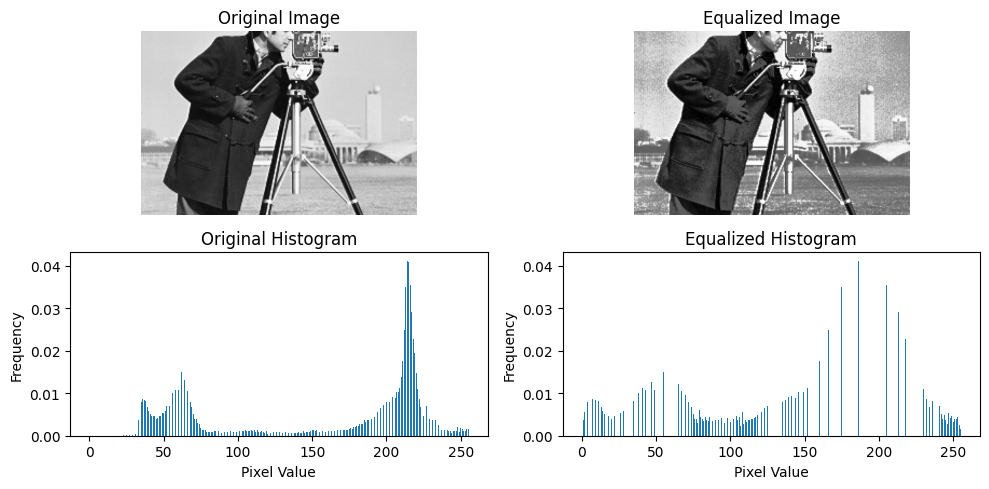

In [24]:

def hist_equi_img(img, Tx):
    height, width = img.shape
    equi_img = np.zeros((height, width), "uint8")

    for i in range(height):
        for j in range(width):
            equi_img[i][j] = Tx[img[i][j]]

    return equi_img

def drawHist(img):
    height, width = img.shape
    hist = np.zeros((256))
    cdfTx = np.zeros((256))

    pre_sum = 0

    for i in range(256):
        hist[i] = np.sum(img == i)
        pre_sum += hist[i]
        cdfTx[i] = pre_sum

    hist = hist / (height * width)
    cdfTx = cdfTx * 255 / (height * width)
    cdfTx = cdfTx.astype("uint8")

    return hist, cdfTx

hist, cdfTx = drawHist(gray_img)
equi_img = hist_equi_img(gray_img, cdfTx)

# Plotting original and equalized images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Equalized image
plt.subplot(2, 2, 2)
plt.imshow(equi_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Original histogram
plt.subplot(2, 2, 3)
x = np.arange(256)
plt.bar(x, hist, width=0.5)
plt.title('Original Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Equalized histogram
plt.subplot(2, 2, 4)
hist_equi, _ = drawHist(equi_img)
plt.bar(x, hist_equi, width=0.5)
plt.title('Equalized Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Filtering(smoothing and sharpening)

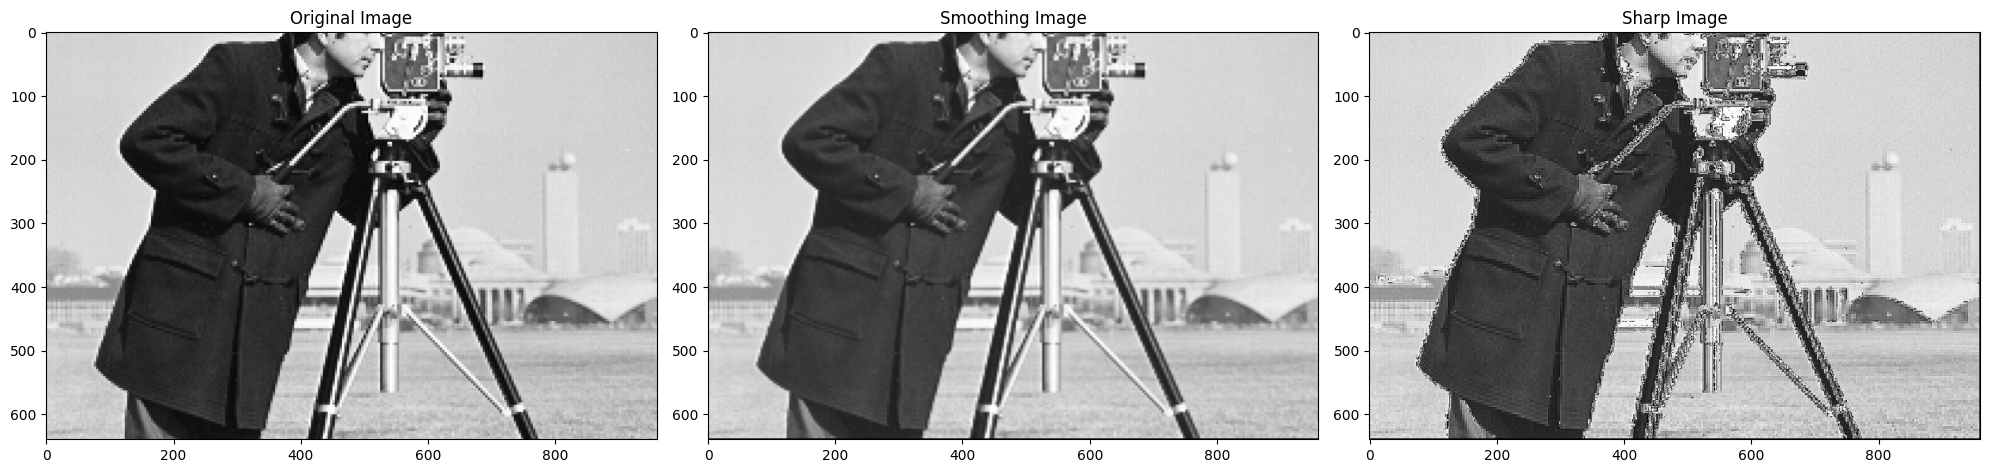

In [29]:
smooth_img = np.zeros_like(gray_img)
sharp_img =  np.zeros_like(gray_img)

smooth_kernel = np.array([[1, 2, 1],[2, 4, 2], [1, 2, 1]]) / 16

sharp_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, - 1, 0]])

for i in range(1, gray_img.shape[0] - 1):
    for j in range(1, gray_img.shape[1] - 1):
        smooth_img[i][j] = np.sum(gray_img[i - 1 : i + 2, j - 1: j + 2] * smooth_kernel)


for i in range(1, gray_img.shape[0] - 1):
    for j in range(1, gray_img.shape[1] - 1):
        sharp_img[i][j] = np.sum(gray_img[i- 1 : i + 2, j - 1 : j + 2] * sharp_kernel)



smooth_img = np.clip(smooth_img, 0, 255).astype(np.uint8)
sharp_img = np.clip(sharp_img, 0, 255).astype(np.uint8)


plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(smooth_img, cmap='gray')
plt.title('Smoothing Image')
plt.subplot(1, 3, 3)
plt.imshow(sharp_img, cmap='gray')
plt.title('Sharp Image')
plt.tight_layout()
plt.show()

